<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [3]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

## ANSWER

If we are going to predict price, in this case price would be the target value.

#### 2.2 List all possible variables which might be Predictor variable.

## ANSWER
#https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/  objects and categorical variables can be tricky if we want to use them as predictor values.
In our dataset all int64 and float64 variables can be predictor variables: zip, beds, baths, sq__ft, latitude and longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [5]:
# ANSWER

#We first need to get rid of duplicated values.
house[house.duplicated()]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [6]:
house[house['street'] == '4734 14TH AVE']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858


In [7]:
house[house['street'] == '8306 CURLEW CT']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519


In [8]:
house[house['street'] == '7 CRYSTALWOOD CIR']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [9]:
#https://stackoverflow.com/questions/50885093/how-do-i-remove-rows-with-duplicate-values-of-columns-in-pandas-data-frame

house.drop_duplicates(subset= ['street', 'city'], keep = 'first', inplace = True)

In [10]:
# Sanity check

house[house.duplicated()]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     981 non-null    object 
 1   city       981 non-null    object 
 2   zip        981 non-null    int64  
 3   state      981 non-null    object 
 4   beds       981 non-null    int64  
 5   baths      981 non-null    int64  
 6   sq__ft     981 non-null    int64  
 7   type       981 non-null    object 
 8   sale_date  981 non-null    object 
 9   price      981 non-null    int64  
 10  latitude   981 non-null    float64
 11  longitude  981 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 99.6+ KB


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

<AxesSubplot:>

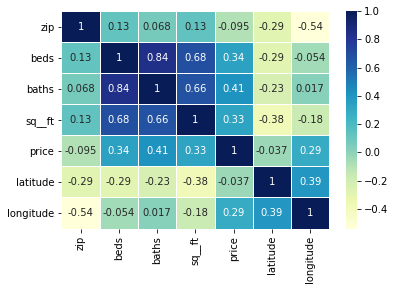

In [12]:
# ANSWER
sns.heatmap(house.corr(), annot = True, cmap = "YlGnBu", cbar = True, linewidths = .5)

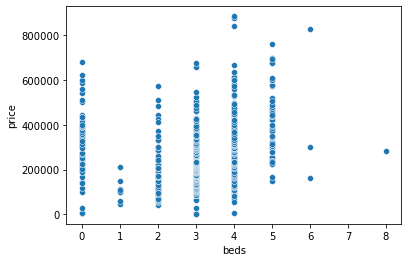

In [13]:
# We should plot price against some other variables to be able to see how correlated they are in a visual way. Based on the heatmap I created above, price seems more correlated with beds, baths and sq-ft.

import matplotlib.pyplot as plt
sns.scatterplot(x= house['beds'], y = house['price'])
plt.show()

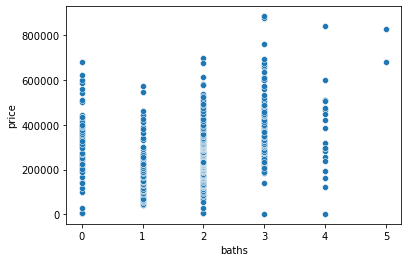

In [14]:
sns.scatterplot(x= house['baths'], y=house['price'])
plt.show()

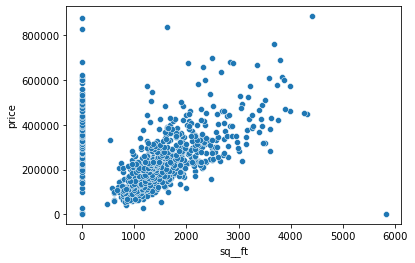

In [15]:
sns.scatterplot(x= house['sq__ft'], y= house['price'])
plt.show()

In [16]:
# Based on the scatterplots above we can choose sq__ft vs price to do prediction calculations.

X = house['sq__ft'] # capital letter x - predictor variable
y = house['price'] # y is target variable

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [17]:
y_mean = house['price'].mean()

In [18]:
# ANSWER

residual = abs(y - y_mean)
print(residual)

0      175473.626911
1      166483.626911
2      165815.626911
3      165388.626911
4      152795.626911
           ...      
980      2270.626911
981       695.626911
982       304.373089
983       605.373089
984      1042.373089
Name: price, Length: 981, dtype: float64


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [19]:
# ANSWER

X = house['sq__ft'] # capital letter x - predictor variable
y = house['price'] # y is target variable

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [20]:
# ANSWER
X_mean = X.mean()
y_mean = y.mean()
beta_1 = ((y - y_mean) * (X - X_mean)).sum() / ((X - X_mean) ** 2).sum()
print(beta_1)

53.77527532695067


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [21]:
# ANSWER

beta_0 = y_mean - (beta_1 * X_mean)
print(beta_0)

163888.28020662576


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [22]:
# ANSWER

y_hat = beta_0 + (beta_1 * X)
print(y_hat)

0      208844.410380
1      226644.026513
2      206693.399367
3      209704.814785
4      206747.174642
           ...      
980    286495.907952
981    243314.361865
982    229279.015004
983    254499.619133
984    237130.205202
Name: sq__ft, Length: 981, dtype: float64


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [23]:
# ANSWER

residual_i = y - y_hat
print(residual_i)

0     -149622.410380
1     -158432.026513
2     -137813.399367
3     -140397.814785
4     -124847.174642
           ...      
980    -54070.907952
981     -9314.361865
982      5720.984996
983    -19198.619133
984     -1392.205202
Length: 981, dtype: float64


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [24]:
# ANSWER

def Rsqr(y, y_mean, y_hat):
    SSres = ((y - y_hat) ** 2).sum()
    SStot = ((y - y_mean) ** 2).sum()
    R_square = 1 - (SSres / SStot)
    return R_square

In [25]:
Rsqr(y, y_mean, y_hat)

0.11014507315971966

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [26]:
from scipy import stats

In [31]:
def lin_reg(X, y):
    beta_1 = (stats.pearsonr(X,y)[0]) * (np.std(y) / np.std(X))
    beta_0 = np.mean(y) - (beta_1 * np.mean(X))
    
    print('The Optimal Y Intercept is ', np.round(beta_0, 2))
    print('The Optimal slope is ', np.round(beta_1, 2))
    return beta_0, beta_1

The Optimal Y Intercept is  163888.28
The Optimal slope is  53.78


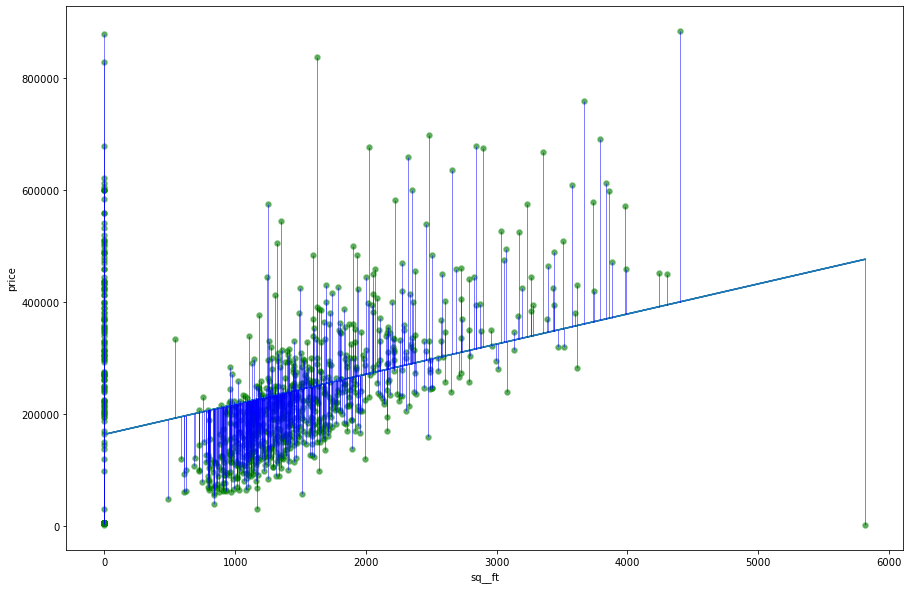

In [32]:
# ANSWER
house.plot.scatter('sq__ft', 'price', color = 'g', lw = 2, alpha = 0.5, figsize = (15, 10))

beta_0, beta_1 = lin_reg(house['sq__ft'], house['price'])
y_hat = beta_0 + (beta_1 * X)

plt.plot(X, y_hat)
plt.plot([X, X], [y, y_hat], c = 'b', lw = 0.5)
plt.show()


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

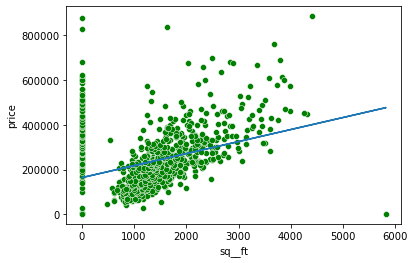

In [33]:
# ANSWER

sns.scatterplot(x= house['sq__ft'], y= house['price'], color='green')
plt.plot(X, y_hat)
plt.show()


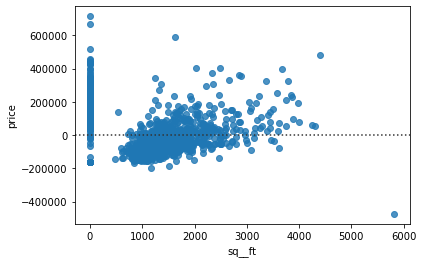

In [34]:
sns.residplot(data= house, x = house['sq__ft'], y = house['price'])
plt.show()

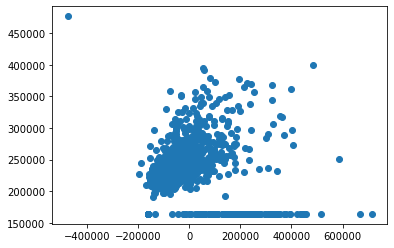

In [35]:
plt.scatter(residual_i, y_hat)
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [36]:
# ANSWER
# X = house['sq__ft']
# y_hat = beta_0 + (beta_1 * X) y_hat will be predicted price as per sq-ft

prediction = beta_0 + (beta_1 * 1204)
print(prediction)

228633.71170027438




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



